In [177]:
import numpy as np           # For numerical operations (arrays, math, etc.)
import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import yfinance as yf        # For downloading stock data from Yahoo Finance


In [178]:
start="2010-01-01"  # Start date for data retrieval
end="2024-02-01"    # End date for data retrieval   
stock="GOOG"  # Stock ticker symbol for Alphabet Inc. (Google)
data=yf.download(stock, start, end)  # Download stock data

[*********************100%***********************]  1 of 1 completed


In [179]:
data.reset_index(inplace=True)  # Reset index to make 'Date' a column

In [180]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2010-01-04,15.536651,15.605068,15.474429,15.541608,78541293
1,2010-01-05,15.468233,15.563671,15.407499,15.547310,120638494
2,2010-01-06,15.078297,15.514587,15.031197,15.514587,159744526
3,2010-01-07,14.727283,15.121432,14.691338,15.106558,257533695
4,2010-01-08,14.923613,14.954103,14.603584,14.675224,189680313
...,...,...,...,...,...,...
3538,2024-01-25,152.915726,154.030441,150.507136,151.024689,21495100
3539,2024-01-26,153.065018,153.383516,152.079694,152.149356,19494500
3540,2024-01-29,154.110077,154.468380,152.199130,152.915737,20909300


In [181]:
ma_100_days=data.Close.rolling(100).mean()

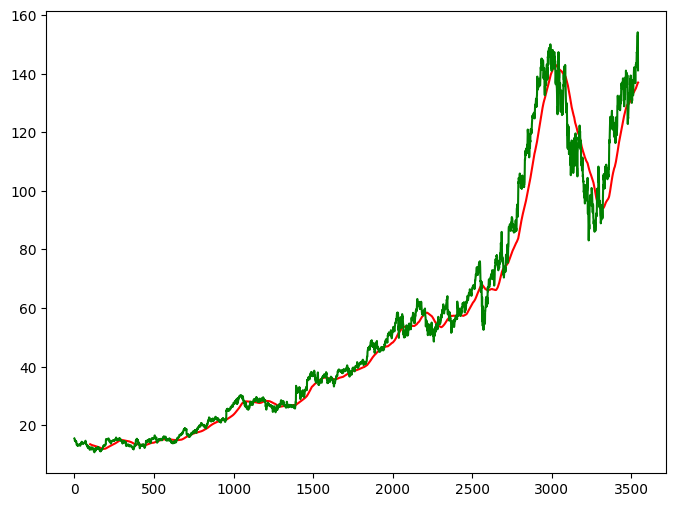

In [182]:
plt.figure(figsize=(8,6)) # Set figure size for the plot
plt.plot(ma_100_days,'r') #close price in red
plt.plot(data.Close,'g')# close price in green
plt.show() 

In [183]:
ma_200_days=data.Close.rolling(200).mean()

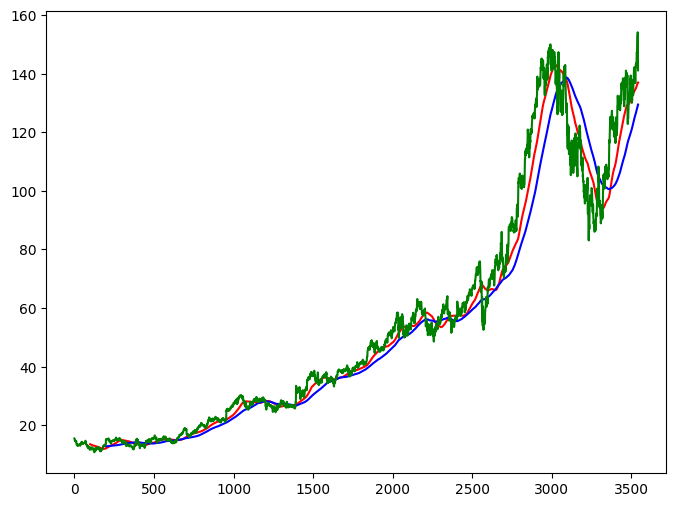

In [184]:
plt.figure(figsize=(8,6)) # Set figure size for the plot
plt.plot(ma_100_days,'r') #close price in red
plt.plot(ma_200_days,'b') #close price in red
plt.plot(data.Close,'g')# close price in green
plt.show()

In [185]:
data.dropna(inplace=True) # Drop rows with NaN values

In [186]:
data_train = pd.DataFrame(data.Close[0 : int(len(data) * 0.80)])   # Training data (first 80%)
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80) : ])     # Testing data (last 20%)


In [187]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1)) # Scale the training data to a range of 0 to 1

In [188]:
data_train_scale=scalar.fit_transform(data_train) # Fit and transform the training data

In [189]:
x=[]
y=[]
for i in range(100, data_train.shape[0]):# Loop through the training data starting from index 100
    x.append(data_train_scale[i-100:i]) # Append the previous 100 days' data to x
    y.append(data_train_scale[i, 0])       # Append the current day's data to y

In [190]:
x,y=np.array(x),np.array(y) # Convert x and y to numpy arrays

In [191]:
from keras.models import Sequential # type: ignore
from keras.layers import LSTM, Dropout, Dense # type: ignore

In [192]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = ((x.shape[1],1))))# type: ignore
# LSTM layer with 50 units and return sequences, input shape is (100, 1)
model.add(Dropout(0.2))#to overfitting of model
# Dropout layer to prevent overfitting

model.add(LSTM(units = 60, activation='relu', return_sequences = True))# type: ignore
# LSTM layer with 60 units and return sequences
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))# type: ignore
# LSTM layer with 120 units and return sequences
model.add(Dropout(0.5))

model.add(Dense(units =1))# type: ignore
# Dense layer with 1 unit (output layer)

C:\Users\amith\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [193]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compile the model with Adam optimizer and mean squared error loss function

In [194]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1) # Train the model for 50 epochs with a batch size of 32

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - loss: 0.0393
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0036
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0041
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0029
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0032
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0024
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0025
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0023
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0027
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0022
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0023
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0023
Epoch 13/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0018
Epoch 14/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0021
Epoch 15/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0021
Epo

In [195]:
model.summary() # Print the model summary

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [196]:
pass_100_days=data_train.tail(100)

In [197]:
data_test=pd.concat((pass_100_days,data_test),ignore_index=True) # Concatenate the last 100 days of training data with the test data

In [198]:
data_test

Ticker,GOOG
0,87.222374
1,87.079544
2,88.432152
3,88.649117
4,88.090271
...,...
804,152.915726
805,153.065018
806,154.110077
807,152.328522


In [199]:
data_test_scale=scalar.transform(data_test) # Scale the test data using the same scaler as training data

In [200]:
x=[]
y=[]
for i in range(100, data_test.shape[0]):# Loop through the training data starting from index 100
    x.append(data_test_scale[i-100:i]) # Append the previous 100 days' data to x
    y.append(data_test_scale[i, 0])       # Append the current day's data to y
x,y=np.array(x),np.array(y) # Convert x and y to numpy arrays

In [201]:
y_predicted=model.predict(x) # Predict the stock prices using the model

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [202]:
scale=1/scalar.scale_ # Get the scale factor from the scaler

In [203]:
y_predicted=y_predicted*scale # Inverse transform the predicted values to original scale

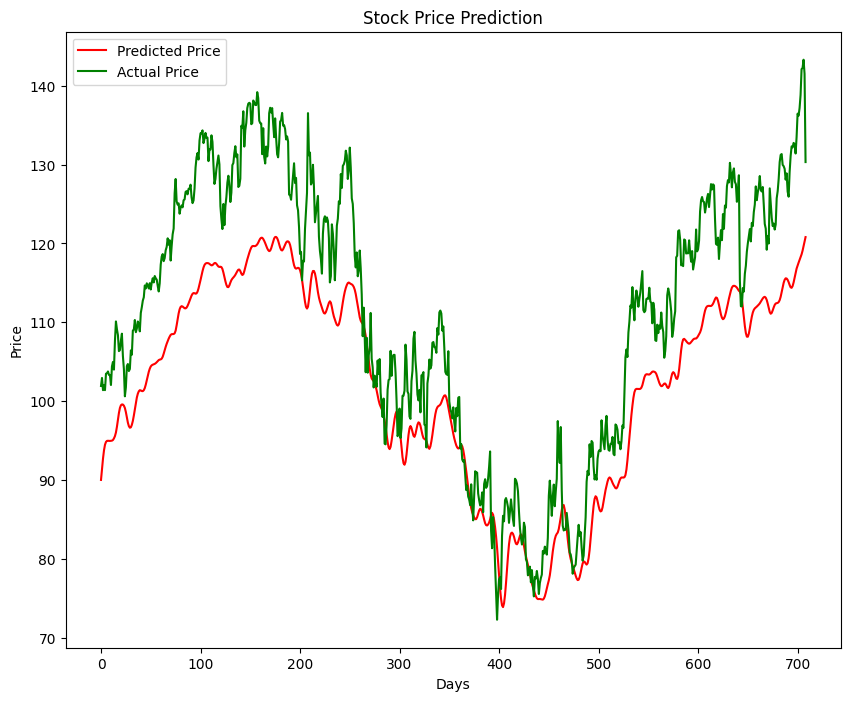

In [204]:
y=y*scale # Inverse transform the actual values to original scale
plt.figure(figsize=(10,8)) # Set figure size for the plot
plt.plot(y_predicted,'r',label='Predicted Price') # Plot the predicted prices in red
plt.plot(y,'g',label='Actual Price') # Plot the actual prices in green
plt.title('Stock Price Prediction') # Set title for the plot
plt.xlabel('Days') # Set x-axis label
plt.ylabel('Price') # Set y-axis label
plt.legend() # Show legend

In [206]:
model.save('stock_predictions Model.keras') # Save the trained model to a file